# Analyse data

# Individual Quizes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

In [2]:
sns.set(style="white", color_codes=True)
sns.set(style="whitegrid")

### Read data

In [3]:
q1 = np.load('scores/Pre_Quiz_Scores.npy', allow_pickle=True).item()
q2 = np.load('scores/Final_Quiz_Scores.npy', allow_pickle=True).item()
q3 = np.load('scores/Map_Scores.npy', allow_pickle=True).item()

In [4]:
students = list(q1.keys())
data = {"student": list(q1.keys()), 
        "pre_quiz": [q1[x][0] for x in students],
        "pre_quiz_norm": [q1[x][1]*100 for x in students],
        "post_quiz": [q2[x][0] for x in students],
        "post_quiz_norm": [q2[x][1]*100 for x in students],
        "map_quiz": [q3[x][0] for x in students],
        "map_quiz_norm": [q3[x][1]*100 for x in students],}
df_students = pd.DataFrame(data)

In [5]:
print(df_students.shape)
df_students

(20, 7)


,student,pre_quiz,pre_quiz_norm,post_quiz,post_quiz_norm,map_quiz,map_quiz_norm
0,oriane_peter,0,0.000000,6,100.000000,2,66.666667
1,thanuditha_wickramasinghe,2,33.333333,5,83.333333,0,0.000000
2,graziano_rossini,2,33.333333,4,66.666667,2,66.666667
3,alfonso_fernandez,1,16.666667,4,66.666667,2,66.666667
4,marcel_moya,1,16.666667,5,83.333333,2,66.666667
5,lukas_deloose,0,0.000000,5,83.333333,2,66.666667
6,anel_muhamedagic,1,16.666667,5,83.333333,3,100.000000
7,alexandre_thimonier,2,33.333333,4,66.666667,2,66.666667
8,guido_sergi,1,16.666667,5,83.333333,1,33.333333
9,kim_haeeun,2,33.333333,5,83.333333,2,66.666667


### Individual Stats

In [6]:
df_students.describe()

,pre_quiz,pre_quiz_norm,post_quiz,post_quiz_norm,map_quiz,map_quiz_norm
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.450000,24.166667,4.700000,78.333333,1.950000,65.000000
std,0.887041,14.784020,0.978721,16.312016,0.944513,31.483775
min,0.000000,0.000000,2.000000,33.333333,0.000000,0.000000
25%,1.000000,16.666667,4.000000,66.666667,1.750000,58.333333
50%,1.500000,25.000000,5.000000,83.333333,2.000000,66.666667
75%,2.000000,33.333333,5.000000,83.333333,3.000000,100.000000
max,3.000000,50.000000,6.000000,100.000000,3.000000,100.000000


### On which type of questions did students perform better: DGSM or SGDM?

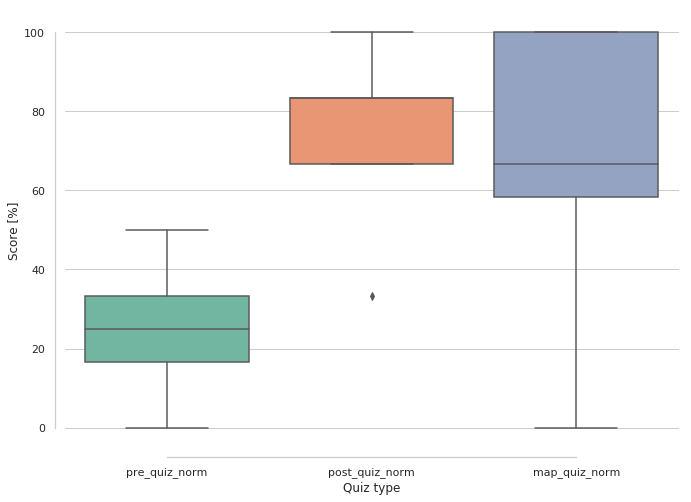

In [7]:
sns.set_context({"figure.figsize": (11,8)})
sns.boxplot(data=df_students[["pre_quiz_norm", "post_quiz_norm", "map_quiz_norm"]], orient="w", palette="Set2")
sns.despine(offset=10, trim=True)

plt.ylabel("Score [%]")
plt.xlabel("Quiz type");

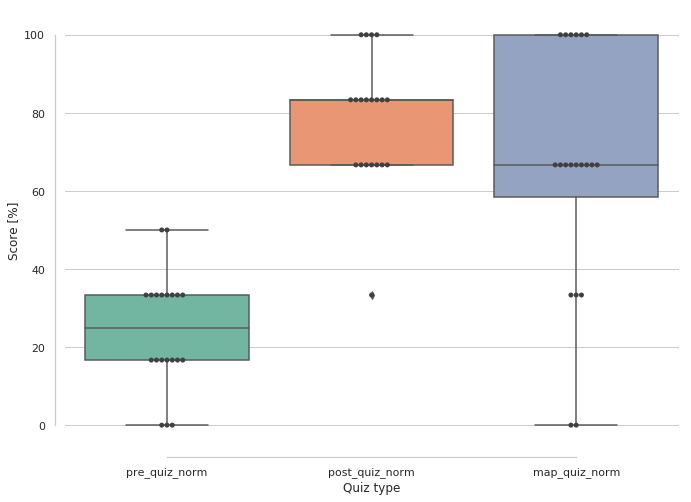

In [8]:
sns.boxplot(data=df_students[["pre_quiz_norm", "post_quiz_norm", "map_quiz_norm"]], orient="w", palette="Set2")
sns.despine(offset=10, trim=True)
sns.swarmplot(data=df_students[["pre_quiz_norm", "post_quiz_norm", "map_quiz_norm"]], color=".25")

plt.ylabel("Score [%]")
plt.xlabel("Quiz type");

### What is density distribution for the Pre-Quiz vs. Post-Quiz results?

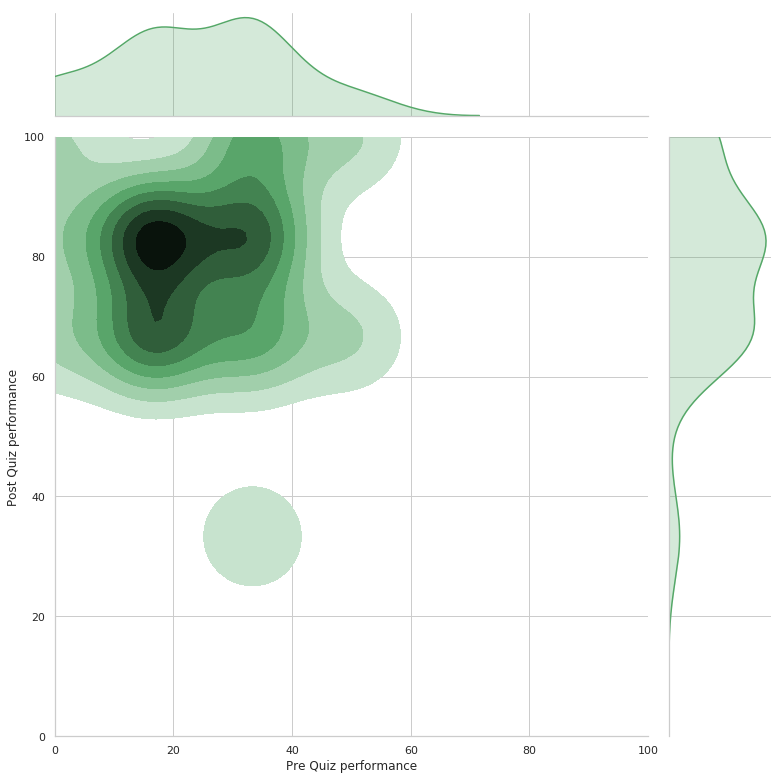

In [24]:
sns.set(style="white", color_codes=True)
sns.set(style="whitegrid")
g = sns.jointplot(x="pre_quiz_norm", y="post_quiz_norm", data=df_students, kind="kde", color="g", height=11,joint_kws=dict(shade_lowest=False))  # "reg", "kde"
g.ax_marg_x.set_xlim(0, 100)
g.ax_marg_y.set_ylim(0, 100)

g.ax_joint.set_xlabel('Pre Quiz performance')
g.ax_joint.set_ylabel('Post Quiz performance');

### What is the performance of each student on Pre-Quiz vs. Post-Quiz?

In [10]:
students = list(df_students["student"])
data = {"student": students*2,
       "quiz": ["pre-quiz"]*len(students) + ["post-quiz"]*len(students),
       "score": [q1[s][0] for s in students] + [q2[s][0] for s in students],
       "score_norm": [q1[s][1]*100 for s in students] + [q2[s][1]*100 for s in students] }
df = pd.DataFrame(data)
df.head()

,student,quiz,score,score_norm
0,oriane_peter,pre-quiz,0,0.000000
1,thanuditha_wickramasinghe,pre-quiz,2,33.333333
2,graziano_rossini,pre-quiz,2,33.333333
3,alfonso_fernandez,pre-quiz,1,16.666667
4,marcel_moya,pre-quiz,1,16.666667


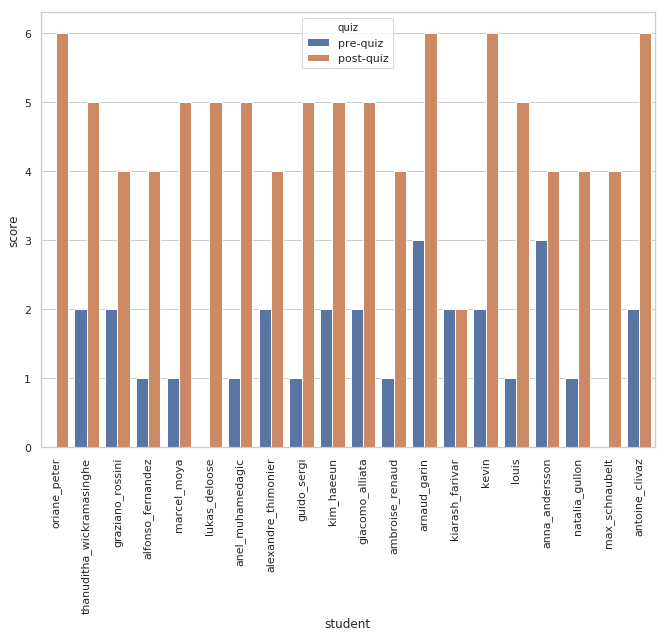

In [11]:
sns.set(style="white", color_codes=True)
sns.set(style="whitegrid")
g = sns.barplot(x="student", y="score", hue="quiz", data=df);
g.set_xticklabels(g.get_xticklabels(), rotation=90);

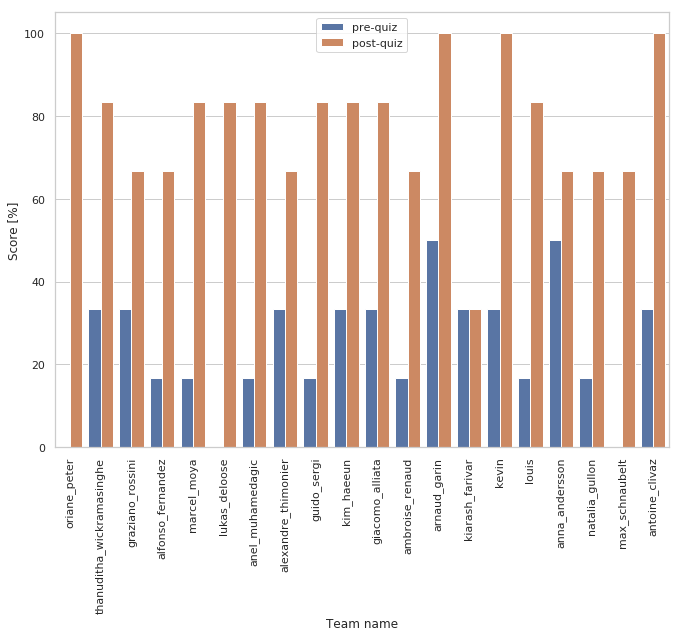

In [12]:
g = sns.barplot(x="student", y="score_norm", hue="quiz", data=df);
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.ylabel("Score [%]")
plt.xlabel("Team name")
plt.legend();

### How much did studens learn (if at all)? 

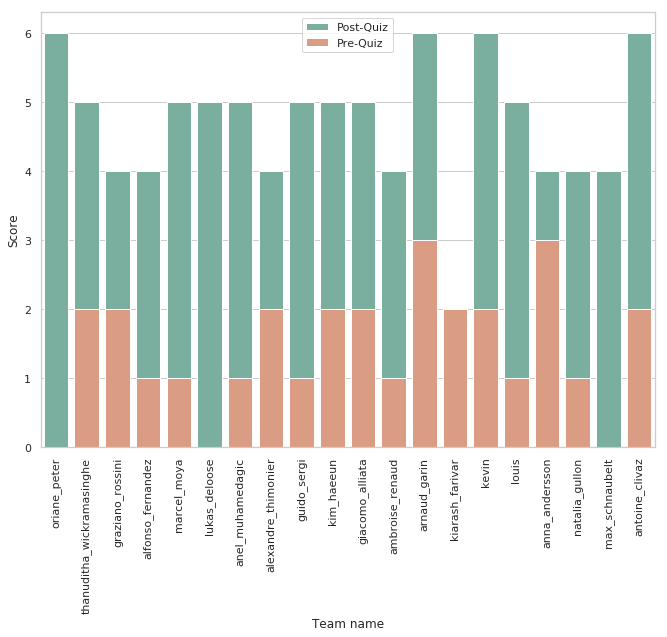

In [13]:
sns.barplot(x = df_students["student"], y = df_students["post_quiz"], color="#72B6A1", label="Post-Quiz")
bottom_plot = sns.barplot(x = df_students["student"], y = df_students["pre_quiz"], color="#E99675", label = "Pre-Quiz")

bottom_plot.set_xticklabels(bottom_plot.get_xticklabels(), rotation=90);
plt.ylabel("Score")
plt.xlabel("Team name")
plt.legend();

---

# Team Quizes

### Read data

In [14]:
q4 = np.load('scores/DGSM_Scores.npy', allow_pickle=True).item()
q5 = np.load('scores/SGDM_Scores.npy', allow_pickle=True).item()

In [15]:
teams = list(q4.keys())
data = {"team": teams, 
        "DGSM": [q4[x][0] for x in teams],  # 9 questions
        "DGSM_norm": [q4[x][1] for x in teams],
        "SGDM": [q5[x][0] for x in teams],  # 9 questions
        "SGDM_norm": [q5[x][1] for x in teams]}
df_teams = pd.DataFrame(data)
df_teams["total"] = df_teams.apply(lambda x: x["DGSM"]+x["SGDM"], axis=1)
df_teams["total_norm"] = df_teams.apply(lambda x: x["total"]/18, axis=1)

In [16]:
print(df_teams.shape)
df_teams

(9, 7)


,team,DGSM,DGSM_norm,SGDM,SGDM_norm,total,total_norm
0,mixed1,7,0.777778,5,0.555556,12,0.666667
1,mixed3,6,0.666667,8,0.888889,14,0.777778
2,mixed4,7,0.777778,7,0.777778,14,0.777778
3,mixed5,6,0.666667,8,0.888889,14,0.777778
4,same1,5,0.555556,8,0.888889,13,0.722222
5,same3,4,0.444444,8,0.888889,12,0.666667
6,same4,7,0.777778,7,0.777778,14,0.777778
7,same5,7,0.777778,7,0.777778,14,0.777778
8,mixed2,7,0.777778,8,0.888889,15,0.833333


### Team Stats

In [17]:
df_teams.describe()

,DGSM,DGSM_norm,SGDM,SGDM_norm,total,total_norm
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,6.222222,0.691358,7.333333,0.814815,13.555556,0.753086
std,1.092906,0.121434,1.000000,0.111111,1.013794,0.056322
min,4.000000,0.444444,5.000000,0.555556,12.000000,0.666667
25%,6.000000,0.666667,7.000000,0.777778,13.000000,0.722222
50%,7.000000,0.777778,8.000000,0.888889,14.000000,0.777778
75%,7.000000,0.777778,8.000000,0.888889,14.000000,0.777778
max,7.000000,0.777778,8.000000,0.888889,15.000000,0.833333


### On which type of questions did teams perform better: DGSM or SGDM?

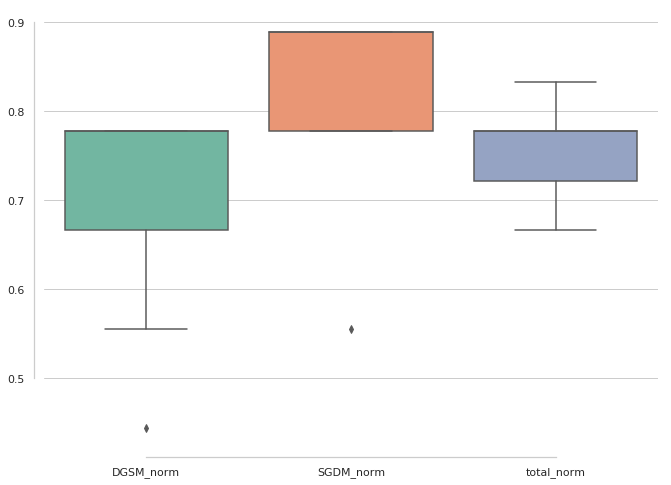

In [18]:
sns.boxplot(data=df_teams[["DGSM_norm", "SGDM_norm", "total_norm"]], orient="w", palette="Set2")
sns.despine(offset=10, trim=True)

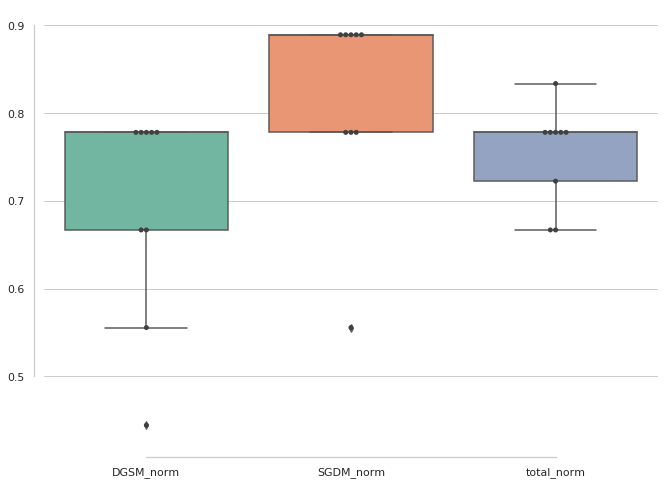

In [19]:
sns.boxplot(data=df_teams[["DGSM_norm", "SGDM_norm", "total_norm"]], orient="w", palette="Set2")
sns.despine(offset=10, trim=True)
sns.swarmplot(data=df_teams[["DGSM_norm", "SGDM_norm", "total_norm"]], color=".25");

### What team performed best?

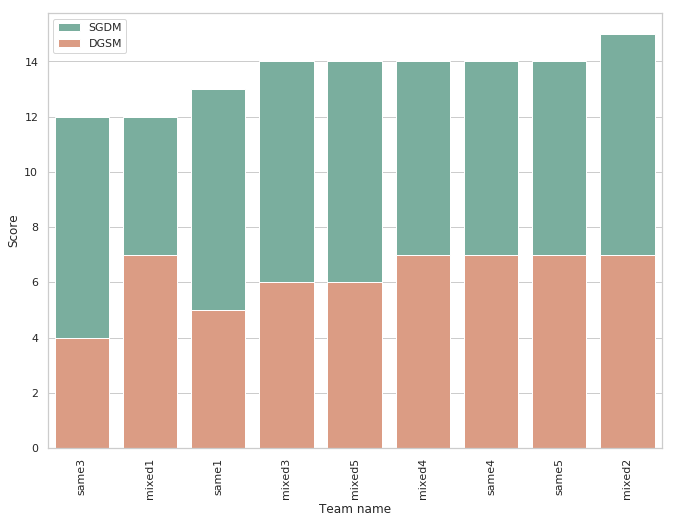

In [20]:
df_teams = df_teams.sort_values(["total", "DGSM"])

sns.barplot(x = df_teams["team"], y = df_teams["total"], color="#72B6A1", label="SGDM")
bottom_plot = sns.barplot(x = df_teams["team"], y = df_teams["DGSM"], color="#E99675", label = "DGSM")

bottom_plot.set_xticklabels(bottom_plot.get_xticklabels(), rotation=90);
plt.ylabel("Score")
plt.xlabel("Team name")
plt.legend();

### What is performance of SAME vs. MIXED teams w.r.t. quiz type (DGSM and SGDM)?

In [21]:
teams = list(df_teams["team"])
data = {"team": teams*2,
       "quiz_type": ["DGSM"]*len(teams) + ["SGDM"]*len(teams),
       "score": [q4[s][0] for s in teams] + [q5[s][0] for s in teams],
        "score_norm": [q4[s][1] for s in teams] + [q5[s][1] for s in teams],
       "team_type": ["SAME" if t.startswith("same") else "MIXED" for t in teams ]*2}
df = pd.DataFrame(data)
df["total"] = df.apply(lambda x: df[df.team==x.team].score.sum(), axis=1)
df.head()

,team,quiz_type,score,score_norm,team_type,total
0,same3,DGSM,4,0.444444,SAME,12
1,mixed1,DGSM,7,0.777778,MIXED,12
2,same1,DGSM,5,0.555556,SAME,13
3,mixed3,DGSM,6,0.666667,MIXED,14
4,mixed5,DGSM,6,0.666667,MIXED,14


##### Question count

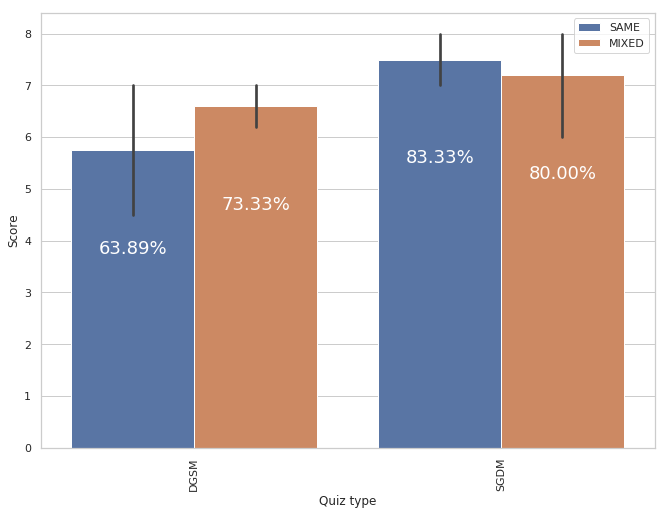

In [22]:
ax = sns.barplot(x="quiz_type", y="score", hue="team_type", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

total_qns = 9
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height-2,
            f'{height/total_qns*100:1.2f}%',
            ha="center",
            color="white",
           fontsize=18) 

plt.ylabel("Score")
plt.xlabel("Quiz type")
plt.legend();

### Which team type performed better: SAME or MIXED?

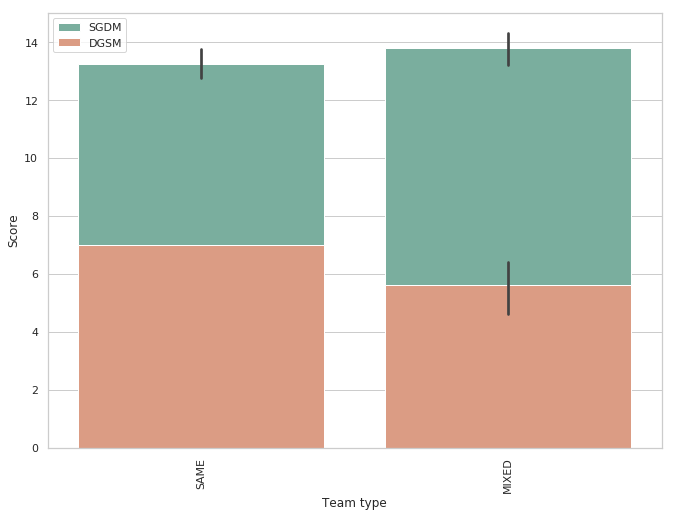

In [23]:
sns.barplot(x = df["team_type"], y = df["total"], color="#72B6A1", label="SGDM")
bottom_plot = sns.barplot(x = df["team_type"], y = df_teams["DGSM"], color="#E99675", label = "DGSM")

bottom_plot.set_xticklabels(bottom_plot.get_xticklabels(), rotation=90);
plt.ylabel("Score")
plt.xlabel("Team type")
plt.legend();